In [93]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)
import pprint

In [77]:
def get_f1_score(eval_df,model_outputs):
    predictions = []
    for x in model_outputs:
        predictions.append(np.argmax(x))
        lb = [i for i in range(9)]
    f1 = f1_score(eval_df['labels'], predictions,labels=lb,average='micro')
    return f1

In [46]:
seed = 42

In [38]:
df = pd.read_csv('ementa_dt.csv')


In [55]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['category'])

NUM_CLASS = len(le.classes_)

new_category = le.transform(df['category'])
df['labels'] = new_category


In [40]:
for i, cls in enumerate(le.classes_):
    print(f'{cls}: {i}')

AGRAVO REGIMENTAL: 0
AÇÃO DIRETA DE INCONSTITUCIONALIDADE: 1
EMBARGOS DE DECLARAÇÃO: 2
EXTRADIÇÃO: 3
HABEAS CORPUS: 4
INQUÉRITO: 5
MANDADO DE SEGURANÇA: 6
RECURSO EXTRAORDINÁRIO: 7
RECURSO ORDINÁRIO: 8


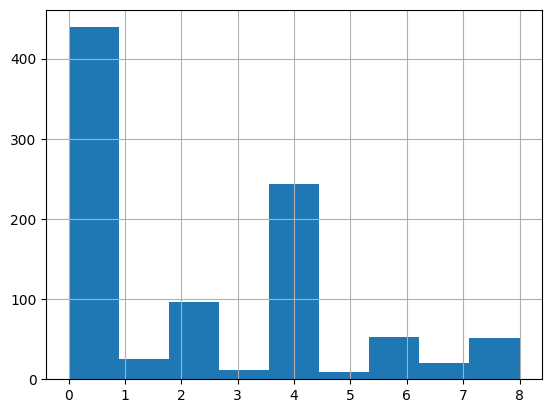

In [41]:
df['labels'].hist(bins=len(le.classes_))
plt.show()

In [42]:
X = [[x,y] for x,y in zip(df['text'],df['labels'])]
y = df['labels']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=seed)
train_data = []
eval_data = []
for example in X_train:
  train_data.append(example)
for example in X_test:
  eval_data.append(example)
print('train size:',len(train_data),'test size:',len(eval_data))

train size: 758 test size: 190


In [48]:
train_df = pd.DataFrame(train_data)
train_df.columns = ["text", "labels"]
eval_df = pd.DataFrame(eval_data)
eval_df.columns = ["text", "labels"]

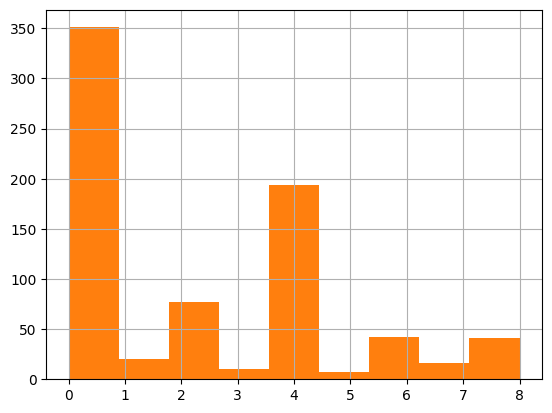

In [50]:
train_df['labels'].hist(bins=9)
plt.show()

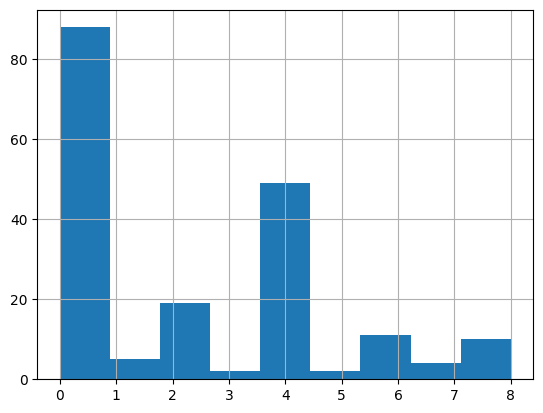

In [51]:
eval_df['labels'].hist(bins=9)
plt.show()

In [81]:
def get_args(output_d):
    model_args = ClassificationArgs(num_train_epochs=2,use_multiprocessing = False,
                                use_multiprocessing_for_evaluation = False,
                                overwrite_output_dir = True,
                                manual_seed=seed,
                                output_dir=output_d,
                                fp16=False)
    return model_args

In [82]:
models = []

In [83]:
output_dir = 'model_outputs/cls/base_portuguese_output'
!rm -r $output_dir
model_args = get_args(output_dir)
name = 'bert-base-portuguese-cased'
model = ClassificationModel(
    "bert", "bert-base-portuguese-cased", num_labels=NUM_CLASS,args=model_args,use_cuda=True, ignore_mismatched_sizes=True,
)
models.append((model,name))

rm: cannot remove 'model_outputs/cls/base_portuguese_output': No such file or directory


Some weights of the model checkpoint at bert-base-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model chec

In [84]:
output_dir = 'model_outputs/cls/legal_bERTimbau_sts_large_output'
!rm -r $output_dir
model_args = get_args(output_dir)
name = 'Legal-BERTimbau-sts-large-ma-v3'
model = ClassificationModel(
    "bert", "Legal-BERTimbau-sts-large-ma-v3", num_labels=NUM_CLASS,args=model_args,use_cuda=True, ignore_mismatched_sizes=True
)
models.append((model,name))

rm: cannot remove 'model_outputs/cls/legal_bERTimbau_sts_large_output': No such file or directory


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Legal-BERTimbau-sts-large-ma-v3 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [85]:
output_dir = 'model_outputs/cls/legal_bERTimbau_large_output'
!rm -r $output_dir
model_args = get_args(output_dir)
name = 'Legal-BERTimbau-large-TSDAE-v5'
model = ClassificationModel(
    "bert", "Legal-BERTimbau-large-TSDAE-v5", num_labels=NUM_CLASS,args=model_args,use_cuda=True, ignore_mismatched_sizes=True
)
models.append((model,name))

rm: cannot remove 'model_outputs/cls/legal_bERTimbau_large_output': No such file or directory


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Legal-BERTimbau-large-TSDAE-v5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [86]:
output_dir = 'model_outputs/cls/legal_bERTimbau_base_output'
!rm -r $output_dir
model_args = get_args(output_dir)
name = 'Legal-BERTimbau-base-TSDAE'
model = ClassificationModel(
    "bert", "Legal-BERTimbau-base-TSDAE", num_labels=NUM_CLASS,args=model_args,use_cuda=True, ignore_mismatched_sizes=True
)
models.append((model,name))

rm: cannot remove 'model_outputs/cls/legal_bERTimbau_base_output': No such file or directory


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Legal-BERTimbau-base-TSDAE and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [87]:
output_dir = 'model_outputs/cls/court_decisions_output'
!rm -r $output_dir
model_args = get_args(output_dir)
name = 'bertimbau-base-finetuned-brazilian_court_decisions'
model = ClassificationModel(
    "bert", "bertimbau-base-finetuned-brazilian_court_decisions", num_labels=NUM_CLASS,args=model_args,use_cuda=True, ignore_mismatched_sizes=True
)
models.append((model,name))

rm: cannot remove 'model_outputs/cls/court_decisions_output': No such file or directory


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bertimbau-base-finetuned-brazilian_court_decisions and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([9, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([9]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [88]:
output_dir = 'model_outputs/cls/base_multilingual_output'
!rm -r $output_dir
model_args = get_args(output_dir)
name = 'bert-base-multilingual-cased'
model = ClassificationModel(
    "bert", "bert-base-multilingual-cased", num_labels=NUM_CLASS,args=model_args,use_cuda=True, ignore_mismatched_sizes=True,
)
models.append((model,name))

rm: cannot remove 'model_outputs/cls/base_multilingual_output': No such file or directory


Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model ch

In [89]:
trained_models = []
for model, name in models:
    print(f'training model {name}:')
    model.train_model(train_df)
    trained_models.append((model,name))

training model bert-base-portuguese-cased:


INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_9_2


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:   Starting fine-tuning.


Running Epoch 0 of 2:   0%|          | 0/95 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/95 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to model_outputs/cls/base_portuguese_output.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_9_2


training model Legal-BERTimbau-sts-large-ma-v3:


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:   Starting fine-tuning.


Running Epoch 0 of 2:   0%|          | 0/95 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/95 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to model_outputs/cls/legal_bERTimbau_sts_large_output.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


training model Legal-BERTimbau-large-TSDAE-v5:


INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_9_2


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:   Starting fine-tuning.


Running Epoch 0 of 2:   0%|          | 0/95 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/95 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to model_outputs/cls/legal_bERTimbau_large_output.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_9_2


training model Legal-BERTimbau-base-TSDAE:


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:   Starting fine-tuning.


Running Epoch 0 of 2:   0%|          | 0/95 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/95 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to model_outputs/cls/legal_bERTimbau_base_output.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_9_2


training model bertimbau-base-finetuned-brazilian_court_decisions:


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:   Starting fine-tuning.


Running Epoch 0 of 2:   0%|          | 0/95 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/95 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to model_outputs/cls/court_decisions_output.
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.


training model bert-base-multilingual-cased:


INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_train_bert_128_9_2


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:   Starting fine-tuning.


Running Epoch 0 of 2:   0%|          | 0/95 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/95 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model: Training of bert model complete. Saved to model_outputs/cls/base_multilingual_output.


In [90]:
model_results = []
for model,name in trained_models:
    result, model_outputs, wrong_predictions = model.eval_model(
    eval_df
)
    f1 = get_f1_score(eval_df,model_outputs)
    result['f1-score'] = f1
    model_results.append((result,name))

INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_9_2


Running Evaluation:   0%|          | 0/24 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.8266599161512496, 'eval_loss': 0.45941379526630044}
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_9_2


Running Evaluation:   0%|          | 0/24 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.8580605958793076, 'eval_loss': 0.36219451001185615}
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_9_2


Running Evaluation:   0%|          | 0/24 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.8573062145966269, 'eval_loss': 0.3929800870440279}
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_9_2


Running Evaluation:   0%|          | 0/24 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.8574290509036984, 'eval_loss': 0.4464850784279406}
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_9_2


Running Evaluation:   0%|          | 0/24 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.8495682900093922, 'eval_loss': 0.4290799853236725}
INFO:simpletransformers.classification.classification_utils: Converting to features started. Cache is not used.
INFO:simpletransformers.classification.classification_utils: Saving features into cached file cache_dir/cached_dev_bert_128_9_2


Running Evaluation:   0%|          | 0/24 [00:00<?, ?it/s]

INFO:simpletransformers.classification.classification_model:{'mcc': 0.7563197256449137, 'eval_loss': 0.6599195254966617}


In [94]:
for result,name in model_results:
    r = pprint.pformat(result, indent=2)
    print(f'Modelo: {name}\nResultados: \n{r}')

Modelo: bert-base-portuguese-cased
Resultados: 
{ 'eval_loss': 0.45941379526630044,
  'f1-score': 0.8789473684210526,
  'mcc': 0.8266599161512496}
Modelo: Legal-BERTimbau-sts-large-ma-v3
Resultados: 
{'eval_loss': 0.36219451001185615, 'f1-score': 0.9, 'mcc': 0.8580605958793076}
Modelo: Legal-BERTimbau-large-TSDAE-v5
Resultados: 
{'eval_loss': 0.3929800870440279, 'f1-score': 0.9, 'mcc': 0.8573062145966269}
Modelo: Legal-BERTimbau-base-TSDAE
Resultados: 
{'eval_loss': 0.4464850784279406, 'f1-score': 0.9, 'mcc': 0.8574290509036984}
Modelo: bertimbau-base-finetuned-brazilian_court_decisions
Resultados: 
{ 'eval_loss': 0.4290799853236725,
  'f1-score': 0.8947368421052632,
  'mcc': 0.8495682900093922}
Modelo: bert-base-multilingual-cased
Resultados: 
{ 'eval_loss': 0.6599195254966617,
  'f1-score': 0.8263157894736841,
  'mcc': 0.7563197256449137}
